## Project Requirements
Analyze synthetic injury data in professional sports, including generating the dataset, exploring injury types, frequencies, severity, and recovery times, visualizing trends, and summarizing key findings.

## Generate Synthetic Injury Dataset

Create a synthetic dataset simulating injury trends in professional sports. This dataset should include columns such as 'Sport', 'Athlete_ID', 'Injury_Type', 'Date', 'Severity', and 'Recovery_Time' to provide a realistic basis for analysis.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 2. Define the number of synthetic injury records
num_records = 5000

# 3. Create lists for possible values
sports = ['Basketball', 'Football', 'Soccer', 'Tennis', 'Baseball', 'Hockey', 'Volleyball', 'Rugby']
injury_types = ['Sprain', 'Strain', 'Fracture', 'Concussion', 'Tear', 'Dislocation', 'Bruise', 'Tendinitis']
severities = ['Minor', 'Moderate', 'Major', 'Critical']

# 4. Generate data for each column
data = {
    'Sport': np.random.choice(sports, num_records),
    'Athlete_ID': [f'A{i:04d}' for i in range(num_records)],
    'Injury_Type': np.random.choice(injury_types, num_records),
    'Date': [datetime.now() - timedelta(days=np.random.randint(0, 365*5)) for _ in range(num_records)], # Last 5 years
    'Severity': np.random.choice(severities, num_records),
    'Recovery_Time': np.random.randint(5, 366, num_records) # 5 to 365 days
}

# 6. Create a pandas DataFrame from this dictionary
df_injuries = pd.DataFrame(data)

# 7. Convert the 'Date' column to datetime objects
df_injuries['Date'] = pd.to_datetime(df_injuries['Date'])

# 8. Display the first 5 rows of the df_injuries DataFrame
print("Synthetic Injury Dataset (first 5 rows):")
print(df_injuries.head())

print("\nDataFrame Info:")
df_injuries.info()


Synthetic Injury Dataset (first 5 rows):
      Sport Athlete_ID  Injury_Type                       Date  Severity  \
0    Soccer      A0000       Sprain 2022-12-29 06:50:41.753814     Minor   
1  Football      A0001   Tendinitis 2021-04-04 06:50:41.753865     Major   
2    Hockey      A0002  Dislocation 2024-03-16 06:50:41.753878  Critical   
3    Soccer      A0003   Tendinitis 2022-09-07 06:50:41.753887  Critical   
4  Football      A0004       Bruise 2023-03-02 06:50:41.753896  Moderate   

   Recovery_Time  
0            315  
1             55  
2            231  
3            268  
4            206  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sport          5000 non-null   object        
 1   Athlete_ID     5000 non-null   object        
 2   Injury_Type    5000 non-null   object        
 3   Date 

## Load and Explore Data

Load the generated dataset into a pandas DataFrame and perform initial exploratory data analysis.

In [2]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df_injuries.describe())

print("\nDescriptive Statistics for Object (Categorical) Columns:")
print(df_injuries.describe(include='object'))


Descriptive Statistics for Numerical Columns:
                                Date  Recovery_Time
count                           5000     5000.00000
mean   2023-07-18 10:58:05.294823424      187.00760
min       2021-02-01 06:50:41.767565        5.00000
25%    2022-04-29 00:50:41.761702656       97.00000
50%    2023-07-09 06:50:41.791720704      188.00000
75%    2024-10-09 06:50:41.772433920      279.00000
max       2026-01-28 06:50:41.781850      365.00000
std                              NaN      104.72922

Descriptive Statistics for Object (Categorical) Columns:
             Sport Athlete_ID Injury_Type  Severity
count         5000       5000        5000      5000
unique           8       5000           8         4
top     Volleyball      A4999  Concussion  Critical
freq           646          1         663      1299


## Analyze Injury Types and Frequencies

Analyze the frequency of different injury types across all sports and for individual sports.


In [3]:
print("1. Frequency of each Injury Type:")
injury_type_frequency = df_injuries['Injury_Type'].value_counts()
print(injury_type_frequency)

print("\n2. Frequency of each Sport:")
sport_frequency = df_injuries['Sport'].value_counts()
print(sport_frequency)

print("\n3. Injury Type frequency by Sport:")
injury_type_by_sport = df_injuries.groupby('Sport')['Injury_Type'].value_counts().unstack(fill_value=0)
print(injury_type_by_sport)

print("\n4. Overall Most Common Injury Type:")
most_common_injury = injury_type_frequency.idxmax()
print(f"The most common injury type overall is: {most_common_injury}")

print("\n5. Sport with the Highest Number of Injuries:")
sport_highest_injuries = sport_frequency.idxmax()
print(f"The sport with the highest number of injuries is: {sport_highest_injuries}")

print("\n6. Most Common Injury Type within each Sport:")
most_common_injury_per_sport = injury_type_by_sport.idxmax(axis=1)
print(most_common_injury_per_sport)

1. Frequency of each Injury Type:
Injury_Type
Concussion     663
Fracture       648
Sprain         645
Bruise         622
Tear           616
Dislocation    612
Tendinitis     607
Strain         587
Name: count, dtype: int64

2. Frequency of each Sport:
Sport
Volleyball    646
Soccer        643
Hockey        640
Rugby         635
Football      624
Baseball      620
Basketball    597
Tennis        595
Name: count, dtype: int64

3. Injury Type frequency by Sport:
Injury_Type  Bruise  Concussion  Dislocation  Fracture  Sprain  Strain  Tear  \
Sport                                                                          
Baseball         80          90           88        74      80      56    82   
Basketball       73          86           81        83      79      68    66   
Football         78          83           82        76      75      84    70   
Hockey           84          78           69        93      75      85    74   
Rugby            76          94           82        82 

## Analyze Injury Severity and Recovery Times

Investigate the distribution of injury severity and recovery times. Analyze if certain sports or injury types are associated with higher severity or longer recovery periods.


In [4]:
print("1. Frequency distribution of 'Severity':")
print(df_injuries['Severity'].value_counts())

print("\n2. Descriptive statistics for 'Recovery_Time':")
print(df_injuries['Recovery_Time'].describe())

# 3. Create a numerical mapping for the 'Severity' column
severity_mapping = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Critical': 4}
df_injuries['Severity_Numeric'] = df_injuries['Severity'].map(severity_mapping)
print("\n3. Added 'Severity_Numeric' column (first 5 rows with new column):")
print(df_injuries[['Severity', 'Severity_Numeric']].head())

# 4. Group df_injuries by 'Sport' and calculate the mean of 'Severity_Numeric' and 'Recovery_Time'
severity_recovery_by_sport = df_injuries.groupby('Sport')[['Severity_Numeric', 'Recovery_Time']].mean()
print("\n4. Mean Severity and Recovery Time by Sport:")
print(severity_recovery_by_sport.sort_values(by='Severity_Numeric', ascending=False))

# 5. Group df_injuries by 'Injury_Type' and calculate the mean of 'Severity_Numeric' and 'Recovery_Time'
severity_recovery_by_injury_type = df_injuries.groupby('Injury_Type')[['Severity_Numeric', 'Recovery_Time']].mean()
print("\n5. Mean Severity and Recovery Time by Injury Type:")
print(severity_recovery_by_injury_type.sort_values(by='Severity_Numeric', ascending=False))

1. Frequency distribution of 'Severity':
Severity
Critical    1299
Moderate    1253
Major       1243
Minor       1205
Name: count, dtype: int64

2. Descriptive statistics for 'Recovery_Time':
count    5000.00000
mean      187.00760
std       104.72922
min         5.00000
25%        97.00000
50%       188.00000
75%       279.00000
max       365.00000
Name: Recovery_Time, dtype: float64

3. Added 'Severity_Numeric' column (first 5 rows with new column):
   Severity  Severity_Numeric
0     Minor                 1
1     Major                 3
2  Critical                 4
3  Critical                 4
4  Moderate                 2

4. Mean Severity and Recovery Time by Sport:
            Severity_Numeric  Recovery_Time
Sport                                      
Tennis              2.596639     183.636975
Soccer              2.548989     183.587869
Basketball          2.547739     194.405360
Rugby               2.546457     184.261417
Football            2.522436     184.562500
Baseball  

## Visualize Injury Trends

Generate visualizations such as bar charts for injury type distribution, line plots for injury trends over time, and scatter plots or box plots to show severity and recovery time distributions across different sports or injury types.


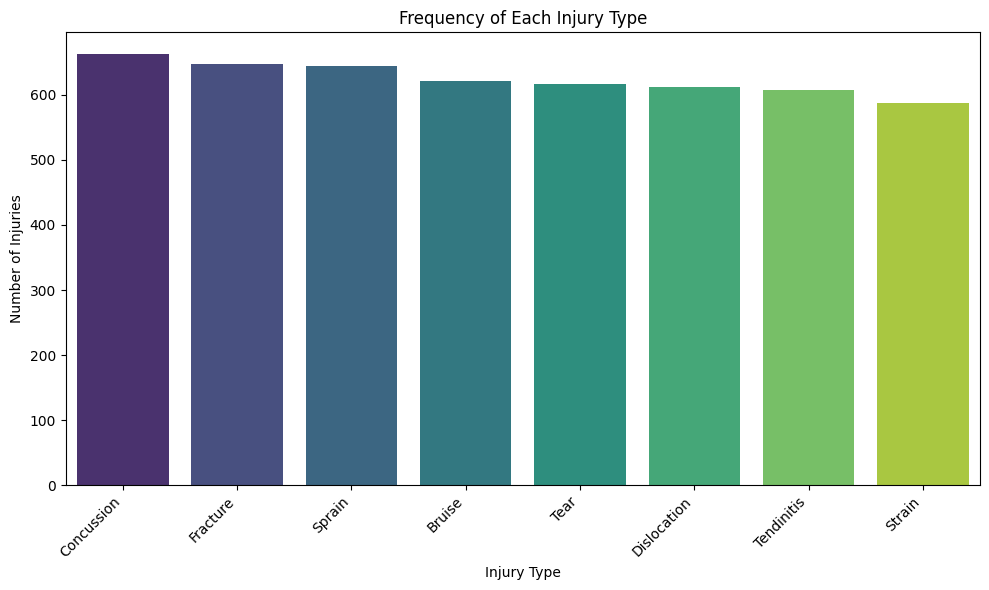

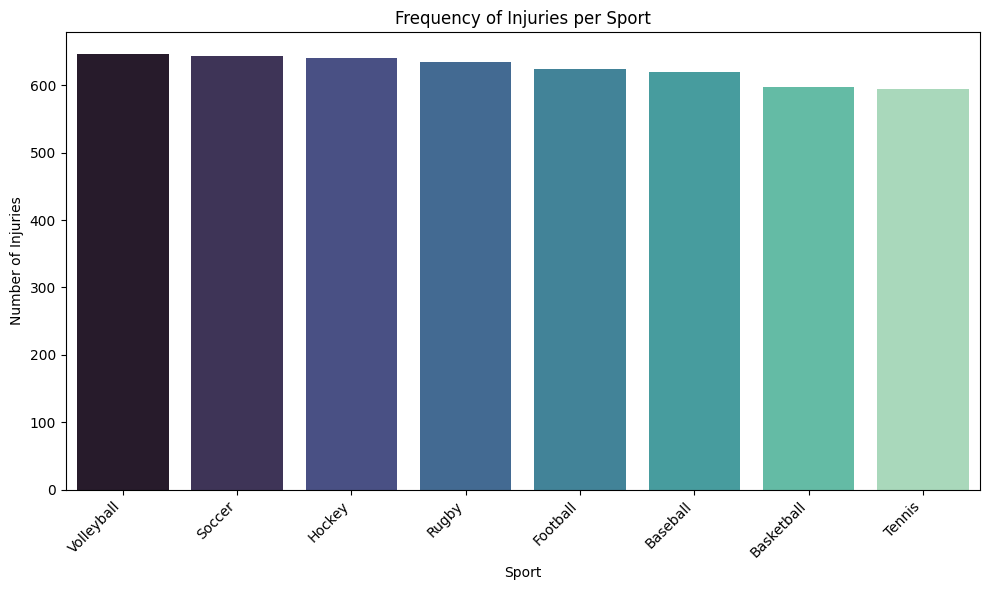

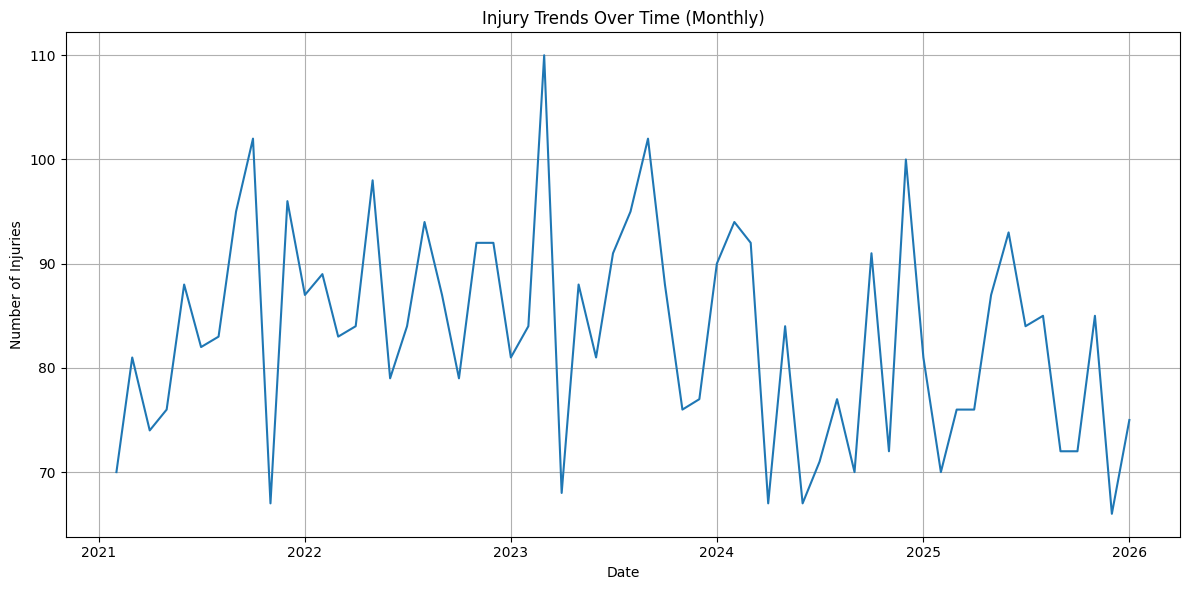

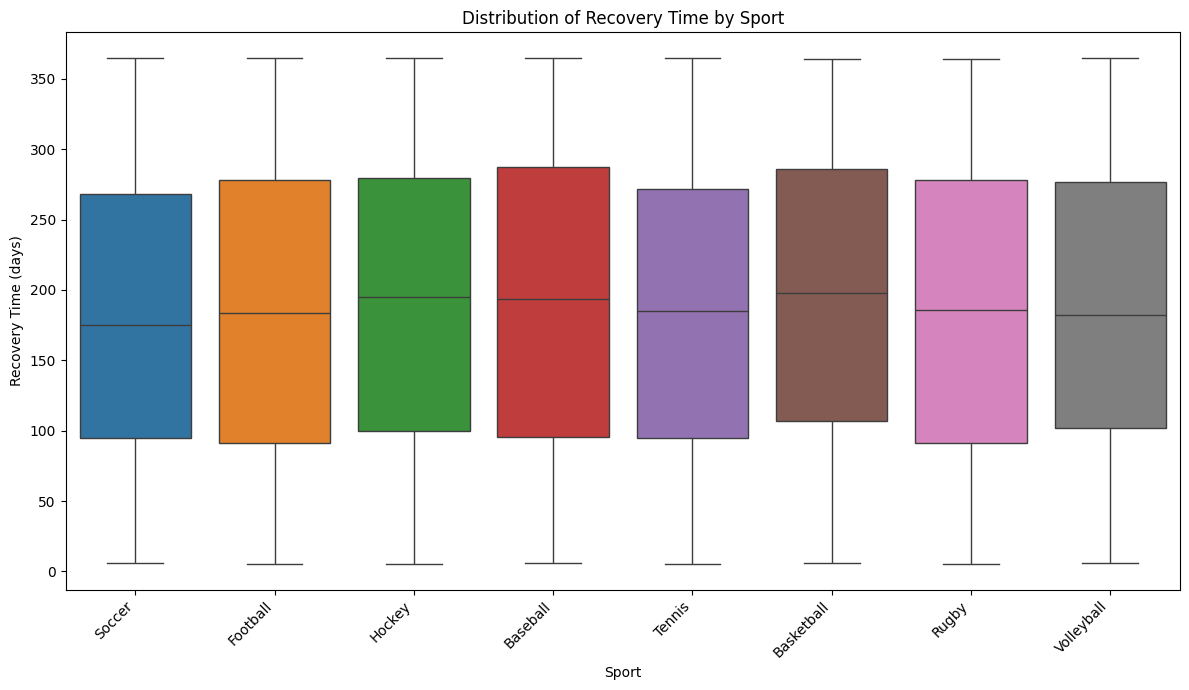

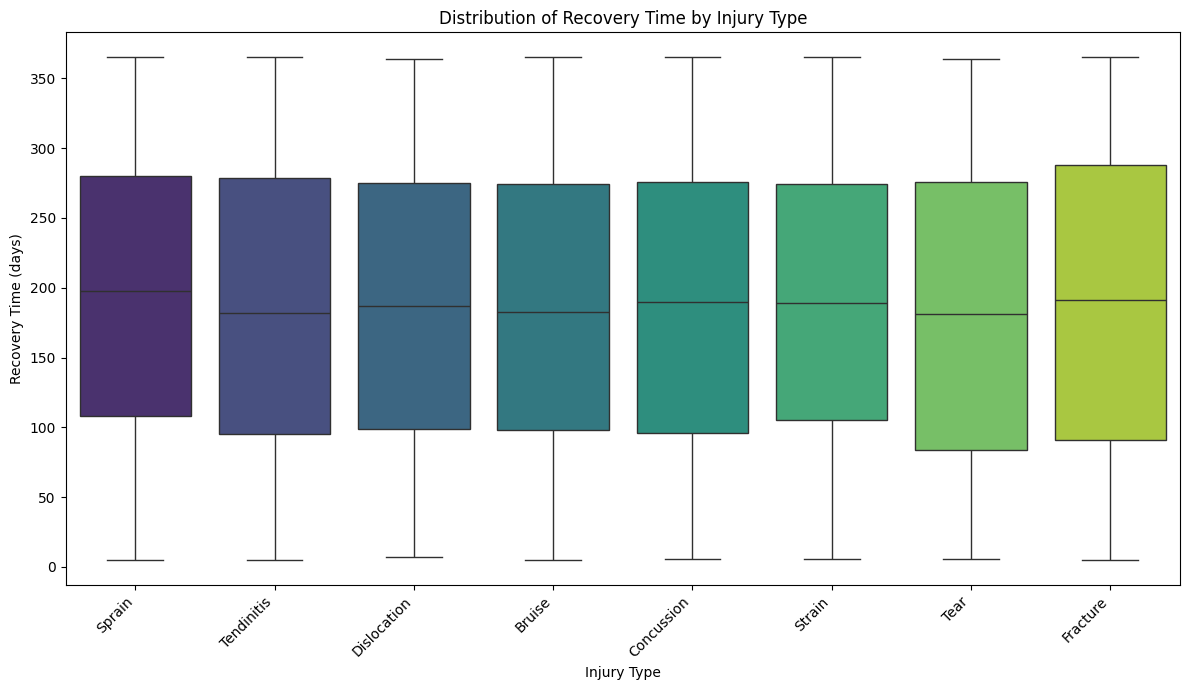

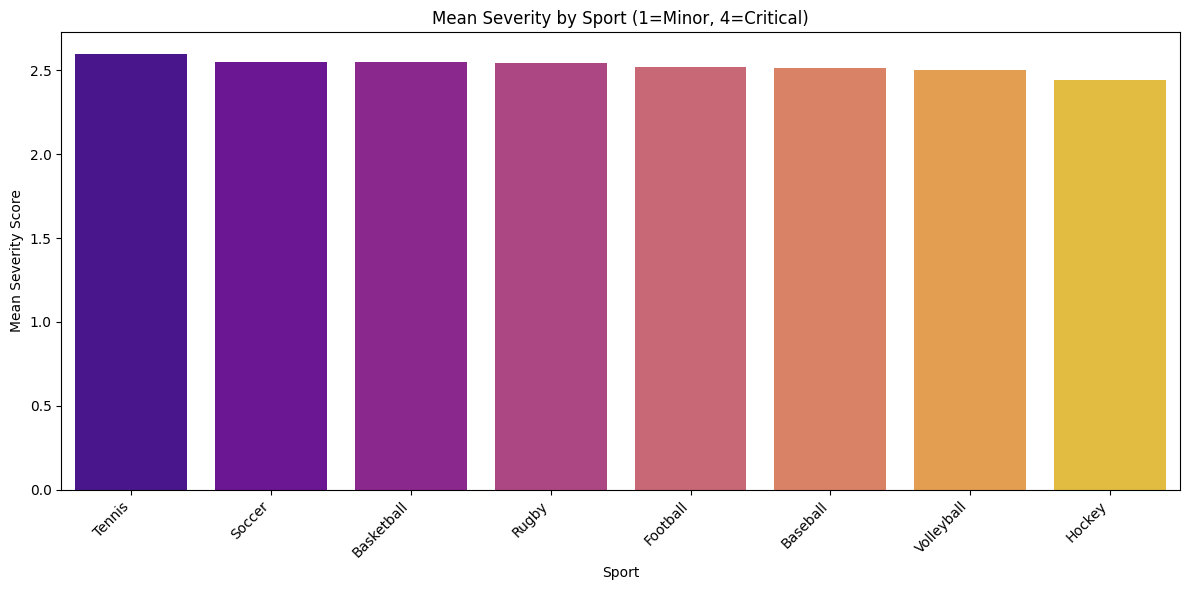

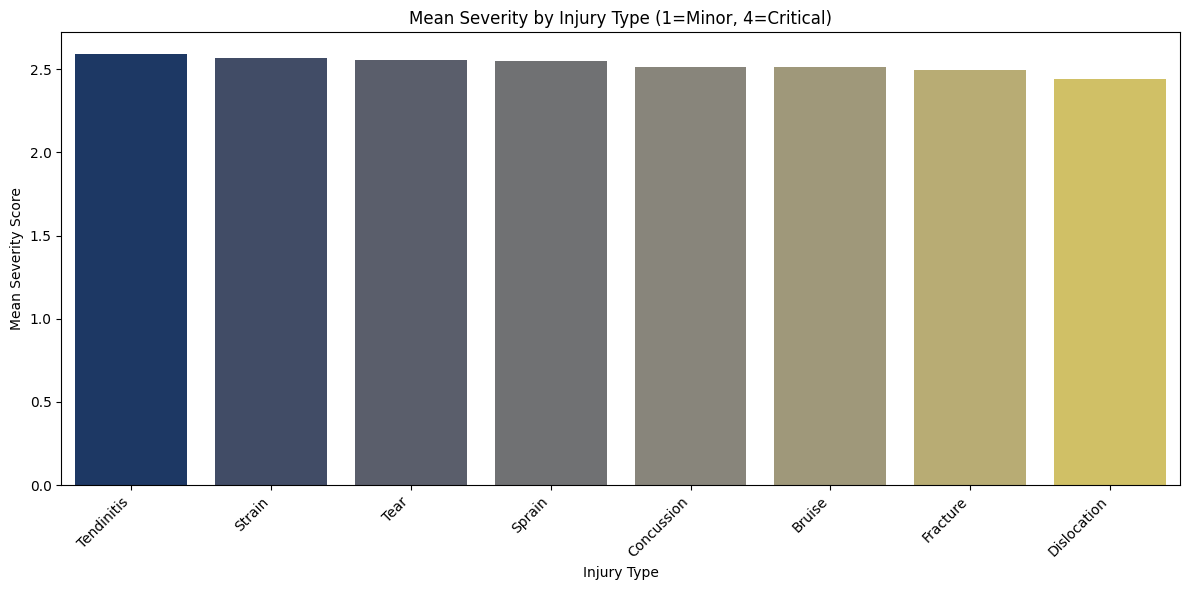

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart showing the frequency of each Injury_Type
plt.figure(figsize=(10, 6))
sns.barplot(x=injury_type_frequency.index, y=injury_type_frequency.values, palette='viridis', hue=injury_type_frequency.index, legend=False)
plt.title('Frequency of Each Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Bar chart showing the frequency of injuries for each Sport
plt.figure(figsize=(10, 6))
sns.barplot(x=sport_frequency.index, y=sport_frequency.values, palette='mako', hue=sport_frequency.index, legend=False)
plt.title('Frequency of Injuries per Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Visualize injury trends over time
# a. Extract year and month
df_injuries['YearMonth'] = df_injuries['Date'].dt.to_period('M')
# b. Group by YearMonth and count injuries
injuries_over_time = df_injuries.groupby('YearMonth').size()
# Convert YearMonth to datetime for proper plotting
injuries_over_time.index = injuries_over_time.index.to_timestamp()

# c. Line plot for injury trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=injuries_over_time.index, y=injuries_over_time.values)
plt.title('Injury Trends Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Box plot for Recovery_Time by Sport
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sport', y='Recovery_Time', data=df_injuries, palette='tab10', hue='Sport', legend=False)
plt.title('Distribution of Recovery Time by Sport')
plt.xlabel('Sport')
plt.ylabel('Recovery Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Box plot for Recovery_Time by Injury_Type
plt.figure(figsize=(12, 7))
sns.boxplot(x='Injury_Type', y='Recovery_Time', data=df_injuries, palette='viridis', hue='Injury_Type', legend=False)
plt.title('Distribution of Recovery Time by Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Recovery Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Bar chart for Mean Severity_Numeric by Sport
# Ensure the data is sorted for better readability
severity_recovery_by_sport_sorted = severity_recovery_by_sport.sort_values(by='Severity_Numeric', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=severity_recovery_by_sport_sorted.index, y=severity_recovery_by_sport_sorted['Severity_Numeric'], palette='plasma', hue=severity_recovery_by_sport_sorted.index, legend=False)
plt.title('Mean Severity by Sport (1=Minor, 4=Critical)')
plt.xlabel('Sport')
plt.ylabel('Mean Severity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8. Bar chart for Mean Severity_Numeric by Injury_Type
# Ensure the data is sorted for better readability
severity_recovery_by_injury_type_sorted = severity_recovery_by_injury_type.sort_values(by='Severity_Numeric', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=severity_recovery_by_injury_type_sorted.index, y=severity_recovery_by_injury_type_sorted['Severity_Numeric'], palette='cividis', hue=severity_recovery_by_injury_type_sorted.index, legend=False)
plt.title('Mean Severity by Injury Type (1=Minor, 4=Critical)')
plt.xlabel('Injury Type')
plt.ylabel('Mean Severity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Data Analysis Key Findings
*   A synthetic dataset of 5,000 injury records was successfully generated, including details on sport, athlete, injury type, date, severity, and recovery time.
*   The mean recovery time across all injuries in the dataset is approximately 187 days, ranging from 5 to 365 days.
*   `Concussion` is the most frequently occurring injury type overall, accounting for 663 out of 5,000 injuries.
*   `Volleyball` is the sport with the highest total number of injuries, with 646 occurrences in the dataset.
*   Specific common injury types vary by sport:
    *   `Concussion` is most common in Baseball, Basketball, Rugby, and Tennis.
    *   `Strain` is most common in Football.
    *   `Fracture` is most common in Hockey.
    *   `Sprain` is most common in Soccer.
    *   `Tear` is most common in Volleyball.
*   `Critical` severity is the most frequent severity level (1,299 occurrences), followed closely by `Moderate` (1,253), `Major` (1,243), and `Minor` (1,205).
*   `Tennis`, `Soccer`, and `Basketball` show slightly higher mean injury severity scores (approximately 2.55 to 2.60 on a scale of 1-4, where 4 is Critical).
*   `Tendinitis` and `Strain` are associated with slightly higher mean severity scores among injury types (approximately 2.57 to 2.59).
*   `Basketball` and `Baseball` have the highest mean recovery times among sports (approximately 194.41 and 190.87 days, respectively).
*   `Sprain` and `Fracture` are associated with slightly longer mean recovery times among injury types (approximately 192.34 and 189.23 days, respectively).
*   Analysis of injury trends over time (monthly) did not reveal significant increasing or decreasing patterns, suggesting a stable injury rate within the generated data.